In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandasql import sqldf

def execute_sql(query):
    return sqldf(query, globals())

# Описание полей

- `timestamp` -- дата и время поста 
<br>
- `company` -- название компании
<br>
- `level` -- уровень специалиста (jun - mid - senior etc)
<br>
- `title` -- название вакансии 
<br>
- `totalyearlycompensation` -- годовая заработная плана. в контексте всех последующих задач, именно это поле будет иметься в виду под названием "зарплата"
<br>
- `location` -- город и штат\страна, где работает специалист
<br>
- `yearsofexperience` -- уровень специалиста
<br>
- `yearsatcompany` -- опыт работы специалиста 
<br>
- `basesalary` -- базовая компенсация
<br>



In [3]:
salaries = pd.read_excel('P01_Salaries_Dataset.xlsx', index_col = 0)

# Обработка данных

In [4]:
salaries.info() # to get the info from the dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                70000 non-null  datetime64[ns]
 1   company                  69995 non-null  object        
 2   level                    69597 non-null  object        
 3   title                    70000 non-null  object        
 4   totalyearlycompensation  70000 non-null  int64         
 5   location                 70000 non-null  object        
 6   yearsofexperience        70000 non-null  float64       
 7   yearsatcompany           70000 non-null  float64       
 8   tag                      69043 non-null  object        
 9   basesalary               70000 non-null  int64         
 10  stockgrantvalue          70000 non-null  float64       
 11  bonus                    70000 non-null  float64       
 12  gender                   48142 n

In [5]:
salaries.isna().sum() # to get the number of nulls in the particular column

timestamp                      0
company                        5
level                        403
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          957
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     21858
Race                       44982
Education                  36091
dtype: int64

In [6]:
salaries['company'] = salaries['company'].str.capitalize() # all these operations is necessary to normalise data in the company_name

In [7]:
salaries['company'] = salaries['company'].str.replace('.com', '', case=False)

/var/folders/xd/xxtmzxj51qgbwxcvrdbzcw900000gn/T/ipykernel_4005/467893471.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  salaries['company'] = salaries['company'].str.replace('.com', '', case=False)


In [8]:
salaries['company'] = salaries['company'].str.replace('.ai', '')

/var/folders/xd/xxtmzxj51qgbwxcvrdbzcw900000gn/T/ipykernel_4005/1312018357.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  salaries['company'] = salaries['company'].str.replace('.ai', '')


In [9]:
salaries

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,NaN,NaN,NaN
1,2017-06-10 17:11:29,Ebay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,NaN,NaN,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,NaN,NaN,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2020-06-16 15:16:13,Walmart labs,E4,Product Manager,192000,"San Bruno, CA",5.0,2.0,Web Development (Front-End),145000,20000.0,27000.0,NaN,NaN,NaN
69996,2021-02-24 20:56:27,Google,L8,Software Engineering Manager,1100000,"Washington, DC",25.0,7.0,Networking,280000,710000.0,110000.0,Male,NaN,Master's Degree
69997,2021-01-04 20:52:36,Facebook,L5 Product Manager,Product Manager,350000,"Menlo Park, CA",7.0,2.0,Product,190000,130000.0,30000.0,NaN,NaN,NaN
69998,2020-12-01 17:03:09,Amazon,L6,Software Engineer,320000,"Seattle, WA",8.0,7.0,Distributed Systems (Back-End),160000,160000.0,0.0,Female,Asian,Bachelor's Degree


Вам необходимо будет проделать несколько задач по датасету, в удобном для вас формате -- либо используя **методы pandas**, либо **через SQL-код**

# Задачи

1. Сколько уникальных компаний находятся в топ 10 по сумме годовых заработной платы `totalyearlycompensation`?
1. Какой средний опыт работы у `Software Engineers` в компании `Oracle` с заработной платой больше `50.000`?
1. Каковы средние зарплаты по локациям `Austin, TX`, `London, EN, United Kingdom` и `Redmond, WA`
1. Какова средняя зарплата в целом в штате Калифорния? `(CA)`

1. Сравните заработные платы компаний "FAANG" против остальных компаний в разрезе позиции `Software Engineer`

1. Сравните среднюю, медиану и моду по заработным платам у `Software Engineers` за периоды 
  `январь 2021 - апрель 2021`  vs `май 2021 - август 2021` (включительно)
1. Визуализируйте данные с предыдущего задания линейным графиком, где должны быть соблюдены следующие условия:
    - Период январь-апрель должен быть зеленого цвета
    - Период май-август должен быть красного цвета
    - на линейном графике должны присутствовать только средние значения (mean)

1. Оцените влияние уровня образования (или его отсутствия) к заработной плате

1. Оцените _зависимость_ между опытом работы `yearsofexperience` и заработной платой

1. Сделайте сравнение уровня зарплат в зависимости от грэйда (level) в компании Amazon на позицию 'Software Engineer'. Постройте визуализацию и **напишите ваши выводы**. [Подробнее о грэйдах в Amazon](https://careerkarma.com/blog/software-engineering-salary-amazon/), [примеры исследования позиций и зарплат в Казахстане](https://zerttey.kolesa.group/datascience#zp)

## Exercise 1

In [10]:
sql_query = """
WITH t AS (
SELECT company, totalyearlycompensation
FROM salaries
ORDER BY totalyearlycompensation DESC
LIMIT 10
)
SELECT COUNT(DISTINCT company) AS unique_companies
FROM t
"""

execute_sql(sql_query) 

,unique_companies
0,6


## Exercise 2

In [11]:
sql_query = """
SELECT AVG(yearsatcompany) as avg_yearsatcompany
FROM salaries
WHERE title = 'Software Engineer' and company = 'Oracle' and basesalary > 50000
"""

execute_sql(sql_query) 

,avg_yearsatcompany
0,2.414921


## Exercise 3

In [12]:
sql_query = """
SELECT location, AVG(basesalary) AS avg_basesalary
FROM salaries
WHERE location IN ('Austin, TX', 'London, EN, United Kingdom', 'Redmond, WA')
GROUP BY location
"""

execute_sql(sql_query)

,location,avg_basesalary
0,"Austin, TX",130633.410673
1,"London, EN, United Kingdom",111062.827225
2,"Redmond, WA",146196.928281


## Exercise 4

In [13]:
sql_query = """
SELECT AVG(basesalary) as avg_basesalary
FROM salaries
WHERE location LIKE '%CA%'
"""

execute_sql(sql_query)

,avg_basesalary
0,155499.755488


## Exercise 5

In [14]:
sql_query = """
WITH t AS (
SELECT 
    1 AS key,
    MAX(basesalary) AS max_basesalary,
    MIN(basesalary) AS min_basesalary,
    AVG(basesalary) AS avg_basesalary,
    COUNT(*) AS number
FROM salaries
WHERE 
    company IN ('Facebook', 'Amazon', 'Apple', 'Netflix', 'Google') 
    AND 
    title = 'Software Engineer'
    AND
    basesalary > 0
), u AS (
SELECT 
    1 AS key,
    MAX(basesalary) AS max_basesalary,
    MIN(basesalary) AS min_basesalary,
    AVG(basesalary) AS avg_basesalary,
    COUNT(*) AS number
FROM salaries
WHERE 
    company NOT IN ('Facebook', 'Amazon', 'Apple', 'Netflix', 'Google') 
    AND 
    title = 'Software Engineer'
    AND
    basesalary > 0
)
SELECT 
    t.max_basesalary - u.max_basesalary AS diff_max_basesalary,
    t.min_basesalary - u.min_basesalary AS diff_min_basesalary,
    t.avg_basesalary - u.avg_basesalary AS diff_avg_basesalary,
    t.number - u.number AS diff_number
FROM t
JOIN u ON t.key = u.key
"""
execute_sql(sql_query) # diff_number is different between pandas and SQL

,diff_max_basesalary,diff_min_basesalary,diff_avg_basesalary,diff_number
0,-727000,10000,19933.2709,-19933


In [15]:
target = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']
faang = salaries[(salaries['company'].isin(target)) & (salaries['title'] == 'Software Engineer') & (salaries['basesalary'] > 0)]['basesalary'].describe()

In [16]:
not_faang = salaries[(~salaries['company'].isin(target)) & (salaries['title'] == 'Software Engineer') & (salaries['basesalary'] > 0)]['basesalary'].describe()

In [17]:
faang

count     12262.000000
mean     151997.808840
std       59326.000126
min       11000.000000
25%      125000.000000
50%      149000.000000
75%      170000.000000
max      893000.000000
Name: basesalary, dtype: float64

In [18]:
not_faang

count    3.219900e+04
mean     1.320574e+05
std      5.158310e+04
min      1.000000e+03
25%      1.010000e+05
50%      1.330000e+05
75%      1.650000e+05
max      1.620000e+06
Name: basesalary, dtype: float64

In [19]:
faang - not_faang

count    -19937.000000
mean      19940.390939
std        7742.904925
min       10000.000000
25%       24000.000000
50%       16000.000000
75%        5000.000000
max     -727000.000000
Name: basesalary, dtype: float64

### Описание результатов 
---
В данной задаче было использовано и pandas код и SQL код для более релевантных результатов. И вот что мы выяснили:
1. Почему-то значение 'count' разнится от использований SQL и pandas, хотя такого быть не должно, и к сожалению причина мне не ясна.
2. Как мы можем заметить, что в FAANG работает почти в три раза меньше сотрудников на позиции "Software Engineer".
3. Если посмотреть на среднюю зарплату специалиста, то можно увидеть, что в FAANG получают зарплату почти 20_000 больше чем в других компаниях.
4. Еще можно упомянуть, то что минимальная зарплата специалиста в FAANG состовляет 11_000, когда в других компаниях минимум равняется 1_000.
5. Но также имеется большая разница в максимальной зарплате, так в FAANG максимум состовляет 893_000, в то время как в других компаниях состовляет 1_620_000, что почти в два раза превышает максимальную зарплату в FAANG.
6. Также стоит упомянуть, что разброс от средней зарплаты у обоих случаях не 60_000.


## Exercise 6

In [15]:
start_date_1 = '2021-01-01' # January 1st
start_date_2 = '2021-05-01' # May 1st
end_date_1 = '2021-09-01' # September 1st

bs_1 = salaries[(salaries['timestamp'] >= start_date_1) & (salaries['timestamp'] < start_date_2) & (salaries['title'] == 'Software Engineer')]
bs_1 = bs_1['basesalary'] # bs - basesalary for particular period 
bs_2 = salaries[(salaries['timestamp'] >= start_date_2) & (salaries['timestamp'] < end_date_1) & (salaries['title'] == 'Software Engineer')]
bs_2 = bs_2['basesalary']

In [16]:
mean_1 = bs_1.mean()
median_1 = bs_1.median()
mode_1 = bs_1.mode().iloc[0]
(mean_1, median_1, mode_1)

(134345.1536643026, 135000.0, 160000)

In [17]:
mean_2 = bs_2.mean()
median_2 = bs_2.median()
mode_2 = bs_2.mode().iloc[0]
(mean_2, median_2, mode_2) 

(128531.46094503374, 130000.0, 160000)

In [18]:
mean_diff = abs(mean_1 - mean_2) # mean_1 > mean_2
median_diff = abs(median_1 - median_2) # median_1 > median_2
mode_diff = abs(mode_1 - mode_2) # mode_1 = mode_2
(mean_diff, median_diff, mode_diff)

(5813.69271926886, 5000.0, 0)

## Exercise 7

In [19]:
mean_1_list = []
mean_2_list = []
for i in range(4):
    base_1 = salaries[(salaries['timestamp'] >= f'2021-0{1+i}-01') & (salaries['timestamp'] < f'2021-0{2+i}-01') & (salaries['title'] == 'Software Engineer')]
    base_1 = base_1['basesalary']
    mean_1_list.append(base_1.mean())
    
    base_2 = salaries[(salaries['timestamp'] >= f'2021-0{5+i}-01') & (salaries['timestamp'] < f'2021-0{6+i}-01') & (salaries['title'] == 'Software Engineer')]
    base_2 = base_2['basesalary']
    mean_2_list.append(base_2.mean())

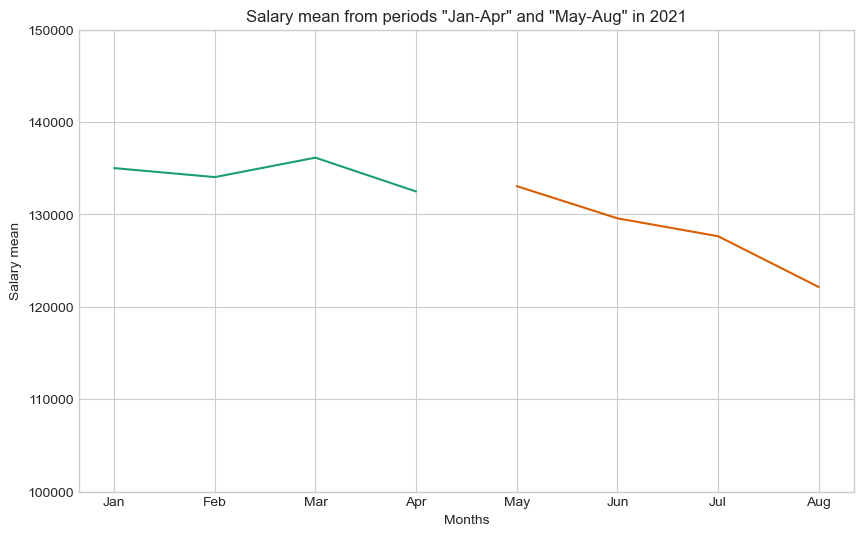

In [20]:
period_1 = ['Jan', 'Feb', 'Mar', 'Apr']
period_2 = ['May', 'Jun', 'Jul', 'Aug']
with plt.style.context(("seaborn-whitegrid")):  
    plt.figure(figsize=(10, 6))
    
    graph_color_1 = sns.color_palette('Dark2')[0]
    graph_color_2 = sns.color_palette('Dark2')[1]
    sns.lineplot(x=period_1, y=mean_1_list, color=graph_color_1)
    sns.lineplot(x=period_2, y=mean_2_list, color=graph_color_2)
    
    plt.title('Salary mean from periods "Jan-Apr" and "May-Aug" in 2021')
    plt.xlabel('Months')
    plt.ylabel('Salary mean')
    
    plt.ylim(100_000, 150_000)
    plt.show()

### Описание результатов 
---
В данной задаче использовались модули pandas для работы с данными и matplotlib для работы с графиками. И вот что мы можем сказать о результатах:
1. Легко можно заметить убывающий тренд для данного графика, то есть средняя зарплата по каждому месяцу показывает с января по август, включительно, 2021 года снижается, и свой минимум достигает в августе. Но есть один месяц, который немного выделяется от тренда, Март, который оказался самым большим средним значением по зарплате.
2. Так же стоит упомянуть, что мода не отличается для обоих случаев (с января по апрель и с мая по август), а медиана и среднее значение отличается в не больше чем на 6000, что примерно составляет 5%.

## Exercise 8

In [26]:
salaries['Education'].fillna("NS", inplace=True) # NS - Not Stated

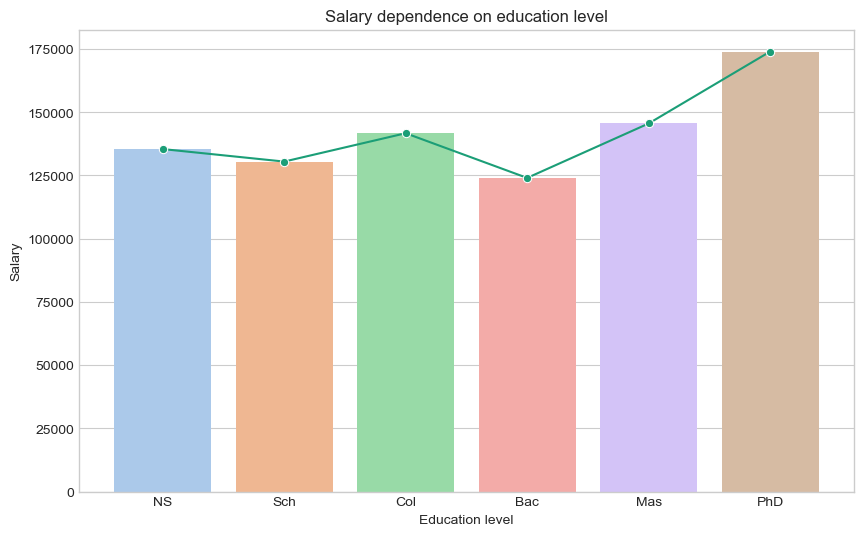

In [27]:
ns_edu = salaries[salaries['Education'] == 'NS']['basesalary'].mean()
sch_edu = salaries[salaries['Education'] == "Highschool"]['basesalary'].mean()
col_edu = salaries[salaries['Education'] == "Some College"]['basesalary'].mean()
bac_edu = salaries[salaries['Education'] == "Bachelor's Degree"]['basesalary'].mean()
mas_edu = salaries[salaries['Education'] == "Master's Degree"]['basesalary'].mean()
phd_edu = salaries[salaries['Education'] == "PhD"]['basesalary'].mean()

# Data visualization --> Here: Bar chart
edu = ['NS', 'Sch', 'Col', 'Bac', 'Mas', 'PhD']
edu_salary = [ns_edu, sch_edu, col_edu, bac_edu, mas_edu, phd_edu]

with plt.style.context(("seaborn-whitegrid")):  
    sns.set_palette('pastel')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=edu, y=edu_salary)
    
    graph_color = sns.color_palette('Dark2')[0]
    sns.lineplot(x=edu, y=edu_salary, marker='o', color=graph_color)

    plt.title('Salary dependence on education level')
    plt.xlabel('Education level')
    plt.ylabel('Salary')

    plt.show()

### Описание результатов 
---
В данной задаче использовались модули pandas для работы с данными и matplotlib для работы с графиками. И вот что мы можем сказать о результатах:
1. Как и ожидалось среди всех университетских дипломов, больше всех в среднем получают люди, которые закончили PhD, а меньше всех Bachelors, и усредненная между данными двумя получают Masters. И мы хорошо можем увидеть данную тенденцию на линейном графике.
2. Но что сильно выбивается из всей картины, так это то что люди, которые закончили школу или немного учились в университете, в среднем получают больше чем человек с высшим образованием. Но более того, человек, который немного учился в  университете, получает почти также как и человек с Masters degree. 
3. Так же стоит упомянуть, что люди, у которых не указан уровень образования были выделены в отдельную колонку, чтобы не использовать нерелевантные данные.
4. В итоге мы получили, что люди с высшим образованием (Bachelors) в среднем получают меньше всех, и люди с PhD получают больше всех.

## Exercise 9

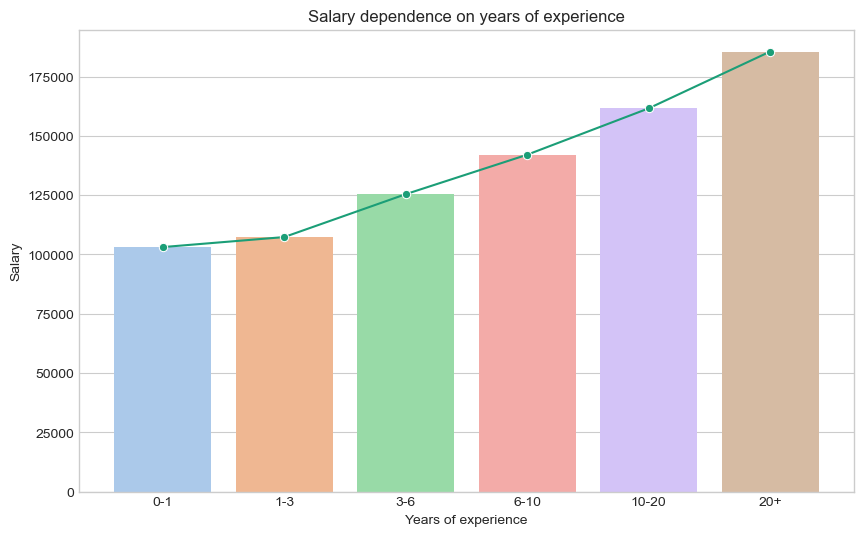

In [28]:
exp_1 = salaries[(salaries['yearsofexperience'] >= 0) & (salaries['yearsofexperience'] < 1)]['basesalary'].mean()
exp_2 = salaries[(salaries['yearsofexperience'] >= 1) & (salaries['yearsofexperience'] < 3)]['basesalary'].mean()
exp_3 = salaries[(salaries['yearsofexperience'] >= 3) & (salaries['yearsofexperience'] < 6)]['basesalary'].mean()
exp_4 = salaries[(salaries['yearsofexperience'] >= 6) & (salaries['yearsofexperience'] < 10)]['basesalary'].mean()
exp_5 = salaries[(salaries['yearsofexperience'] >= 10) & (salaries['yearsofexperience'] < 20)]['basesalary'].mean()
exp_6 = salaries[salaries['yearsofexperience'] >= 20]['basesalary'].mean()

# Data visualization --> Here: Bar chart
exp = ['0-1', '1-3','3-6','6-10','10-20','20+']
exp_salary = [exp_1, exp_2, exp_3, exp_4, exp_5, exp_6]

with plt.style.context(("seaborn-whitegrid")):  
    sns.set_palette('pastel')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=exp, y=exp_salary)

    graph_color = sns.color_palette('Dark2')[0]
    sns.lineplot(x=exp, y=exp_salary, marker='o', color=graph_color)
    
    plt.title('Salary dependence on years of experience')
    plt.xlabel('Years of experience')
    plt.ylabel('Salary')

    plt.show()

### Описание результатов 
---
В данной задаче использовались модули pandas для работы с данными и matplotlib для работы с графиками. И вот что мы можем сказать о результатах:
1. Как и ожидалось, чем больше лет опыта у специалиста, тем выше в среднем он получает зарплаты. Данный тренд наглядно демонстрируется графиком, который можно сравнить с графиком линейной функции, что подтверждает то, что чем больше опыта, тем выше зарплата.
2. Минимальная зарплата у тех, у кого опыта либо нет, либо не превышает года и в среднем состовляет около 102_000.
3. Максимальная зарплата же у тех, у кого опыта больше 20 лет и в среднем состовляет 183_000.

## Exercise 10

In [29]:
salaries['level'].fillna('NS', inplace = True) # NS - Not Stated

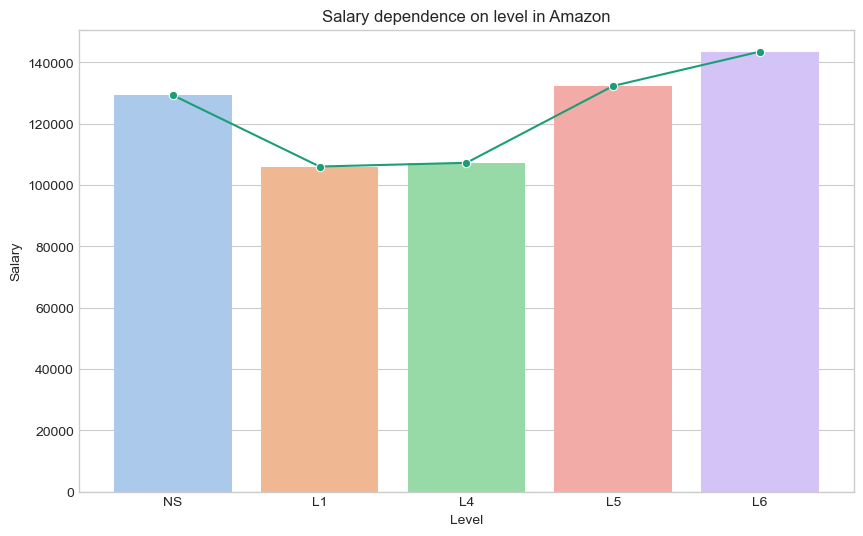

In [30]:
amazon = salaries[(salaries['company'] == 'Amazon') & (salaries['title'] == 'Software Engineer')]
lvl_ns = amazon[amazon['level'] == 'NS']['basesalary'].mean()
lvl_1 = amazon[amazon['level'] == 'L1']['basesalary'].mean() # There are only L1, L4, L5 and L6 levels in this dataset
lvl_4 = amazon[amazon['level'] == 'L4']['basesalary'].mean()
lvl_5 = amazon[amazon['level'] == 'L5']['basesalary'].mean()
lvl_6 = amazon[amazon['level'] == 'L6']['basesalary'].mean()

# Data visualization --> Here: Bar chart
lvl = ['NS', 'L1', 'L4', 'L5', 'L6']
lvl_salary = [lvl_ns, lvl_1, lvl_4, lvl_5, lvl_6]

with plt.style.context(("seaborn-whitegrid")):  
    sns.set_palette('pastel')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=lvl, y=lvl_salary)
    
    graph_color = sns.color_palette('Dark2')[0]
    sns.lineplot(x=lvl, y=lvl_salary, marker='o', color=graph_color)

    plt.title('Salary dependence on level in Amazon')
    plt.xlabel('Level')
    plt.ylabel('Salary')

    plt.show()

### Описание результатов 
---
В данной задаче использовались модули pandas для работы с данными и matplotlib для работы с графиками. И вот что мы можем сказать о результатах:
1. Как и ожидалось, чем выше уровень самого специалиста тем больше в среднем он получает зарплаты. Особенно заметен сильный рост с L4 до L5.
2. К удивлению, в среднем специалисты уровня L1 и L4 получают одинаковую зарплату, хотя в данном случае данные не могут быть релевантны, так как специалистов L1 уровня всего 2, когда как специалистов L4 больше 1500.
3. Также в графике выделен отдельный столбик для тех специалистов, у которых не указан уровень для более релевантного сбора информации.
4. В итоге, как и ожидалось чем выше уровень специалиста в компании, тем больше в среднем он будет получать.